# Flights Network Project - Computational thinking 2019

This Notebook describes a data analysis project created by Jaap van der Aar, Kirsten Bulsink and Giulio Castegnaro. The project is part of the course Computational Thinking at Universiteit Utrecht. The students have dealt with Python code and data about more than 60.000 flights from (and to) every part of the World. This Notebook describes briefly the main part of the project. 
What we want to plot: top 3 airlines, top 3 airports, barplots, compare top 2 airlines (FR and AA), some statistics.  

To begin with, it is necessary to import some modules. We decided to create different modules (scripts) in order to have a cleaner main part. Moreover, we used a package called NetworkX to help us organize the analysis of the flights networks.

In [22]:
import networkx as nx
import base_preprocessing as bpp
import module_visualization_worldmap as worldmap
import module_comparison as comp
import module_inspect_data as inspect

#ADD PACKAGES TO BE ADDED 

We started out from two different datasets found on Kaggle. We decided to merge the two of them and to work with a vast dataframe containing more than 60.000 flight routes. Moreover, we implemente a new dataframe to add the complete name of the airlines to better define them. 
For visualization purposes, we found necessary to implement also a "cleaning" function that gets rid of all the flights whose destination or source airport is only contained as one of the two types in the data frame. In this way, we will be able to display all the airports later in the visualization process. 

In [13]:
# define filenames which you want to load
# in this case a csv with all flight routes and a csv with geographical locations of airports
filename_routes = "routes.csv"
filename_airports = "airports-extended.csv"
filename_airlines = "airlines.txt"

# load flight routes data into dataframe
try:
    df_routes = bpp.load_data_routes_from_file(filename_routes)
except FileNotFoundError:
    print("file not found, please check filename_routes and current directory")
except Exception as err: 
    print("Something went wrong")
    print(err)

# load airports data into dataframe    
try:
    df_airports = bpp.load_data_airports_from_file(filename_airports)
except FileNotFoundError:
    print("file not found, please check filename_routes and current directory")
except Exception as err: 
    print("Something went wrong")
    print(err)   
    
# load airlines data into dataframe    
try:    
    df_airlines = bpp.load_data_airlines_from_file(filename_airlines)
except FileNotFoundError:
    print("file not found, please check filename_routes and current directory")
except Exception as err: 
    print("Something went wrong")
    print(err) 
    
# left outer join of routes and airlines dataframes
df_merge_airlines_info = bpp.left_merge_dataframes(df_routes, df_airlines, "airline ID")

# left outer join of routes and airports dataframes
df_merged = bpp.left_merge_dataframes(df_merge_airlines_info, df_airports, "source airport ID")

# reindex columns of dataframe
df_merged = df_merged.reindex(columns=["airline IATA code", "airline ID", "name airline", "country airline", "source airport", "source airport ID", "destination airport", "destination airport ID", "airport name", "airport city", "airport country", "latitude", "longitude"])

# cleaning of the merged dataframe
df_merged = bpp.clean_dataframe(df_merged)     

We now can start to inspect the merged dataframe (df_merged). For example discovering which are the top 10 countries with most airports  


The 10 countries with most airports: 



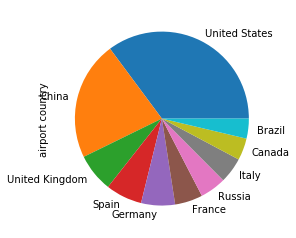

In [14]:
print('\nThe 10 countries with most airports: \n')
df_merged['airport country'].value_counts()[0:10].plot.pie()

Or discovering the top 10 airports ranked by number of flights. 


The 10 biggest airports based on number of incoming flights: 



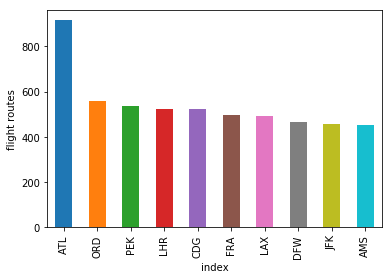

In [16]:
print('\nThe 10 biggest airports based on number of incoming flights: \n')
inspect.inspect_most_flights_airports(df_merged)

Or even knowing more about the biggest airlines in the World.


The 10 biggest airlines: 

  airline IATA code  flight_routes_nr
0                FR              2484
1                AA              2351
2                UA              2179
3                DL              1981
4                US              1959
5                CZ              1452
6                MU              1263
7                CA              1260
8                WN              1146
9                U2              1130


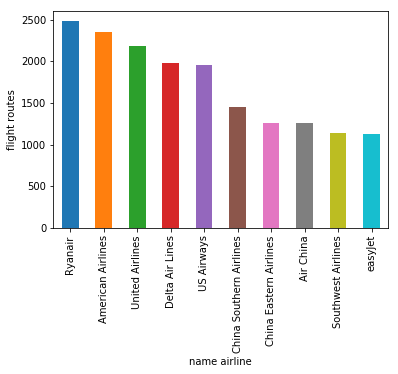

In [27]:
print('\nThe 10 biggest airlines: \n')
airline_table_name = comp.airline_table_name(df_merged)
print(comp.airline_table(df_merged)[:10])
top_table = airline_table_name[:10]
comp.barplot_airlines(top_table)

But these are only rows and columns. What if you are a "visual learner" and would desire to look at airports and flights from above? 
Here you have a demo visualization of our skies. You can decide to focus on flights or airports, making changes on variables like edge_visibility, node_visibility and node_size. 

In [6]:
#to visualize the World map and all the airports in the dataframe 
edge_visibility = 0
#to visualize the World map and all the connections in the dataframe 
node_visibility = 0
#to modify size with which the airports are visualized
node_size = 20 
directionality = nx.Graph()
worldmap.visualize_on_worldmap(df_merged, directionality, node_size, node_visibility, edge_visibility)

NameError: name 'worldmap' is not defined

There is then the possibility to have a general presentation of the dataframe.
It is now possible to merge the last two features showed and visualize on a map a specific amount of top airlines.

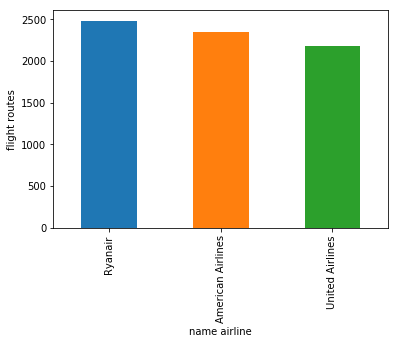

In [30]:
    
#create a table with the top airlines with n. of flights
airline_table_name = comp.airline_table_name(df_merged)
airline_table = comp.airline_table(df_merged)
#dataframe with the flights of the desired n.of airlines 
dataframe = comp.take_nairlines(df_merged, airline_table, 3)
# take top n rows of table specifief by number
top_table = airline_table_name[:3]
# show barplot of amount of flight routes (edges) per hub airport
comp.barplot_airlines(top_table)

worldmap.visualize_on_worldmap(dataframe, directionality, node_size, hub_nr)


If you would like to focus on your favorite airline you just to type its name as a parameter. 

In [31]:
dataframe = comp.define_airline_through_user_input(df_merged)
#add visualization function
worldmap.visualize_on_worldmap(dataframe, directionality, node_size, hub_nr)



        Which airline do you want to visualise? Enter the 2-letter IATA code in 
        capital letters.
        
        For inspiration see the 10 airlines with the most flight routes: 
                        
        FR	Ryanair
        AA	American Airlines
        UA	United Airlines
        DL	Delta Air Lines
        US	US Airways
        CZ	China Southern Airlines
        MU	China Eastern Airlines
        CA	Air China
        WN	Southwest Airlines
        U2	easyJet
        
        Enter your answer here: FR


NameError: name 'worldmap' is not defined

In a similar manner it it also possible to select how many among the most connected airports to visualize. In this case the user selects the top 3 airports, but the number is easily changeable (ranging from 1 to 50). In this case we will visualize the first 3 airports ranked by degree of connectedness. 


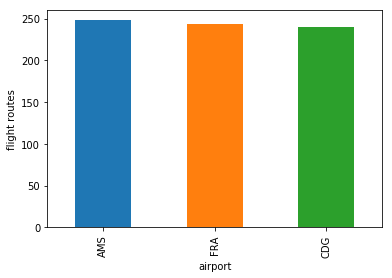

In [32]:
# determine what are the top 'n' most connected airports (hubs)
hub_table = comp.find_hubs_in_df(df_merged, 3)
                
# create a dataframe with only the in- and outcoming flights from hub airports
dataframe = comp.hub_network_df(df_merged, hub_table)
                
# show barplot of amount of flight routes (edges) per hub airport
comp.barplot_from_df(hub_table, x="airport" , y="degree", ylabel="flight routes")

worldmap.visualize_on_worldmap(dataframe, directionality, node_size, hub_nr)


If you are curious to discover all the flight from and to a specific airport, you just need to type the 3 capital letters code corresponding to it. As a default setting, we will visualize Amsterdam Schipol. 
Want more ideas? Have fun with Frankfurt airport (FRA), New york (JFK) or Tokyo (HND). 

In [36]:
unadjusted_dataframe = comp.specific_airport_df(dataframe, 'AMS')
dataframe = bpp.clean_dataframe(unadjusted_dataframe)
#TRY IF IT WORKS WITH AMS OR NEEDED 'AMS'
worldmap.visualize_on_worldmap(dataframe, directionality, node_size, hub_nr)


Finally, it's also possible to make some comparisons, to evaluate two different airlines or hubs and see differences and similarities between the two. You just need to think which ones you would like to analyze. As an example, it is here presented the comparison between Amsterdam and Frankfurt. But again, just type your favorite airport's 3 letters code and visualize its network. 


In [37]:
# let user specify airlines to visualize and create dataframes for both 
df_airline1 = comp.define_airline_through_user_input(df_merged)
print("\nYou choose your first airline. Now select another one to compare!")
        
df_airline2 = comp.define_airline_through_user_input(df_merged)
        

# visualize airline networks on worldmap
worldmap.visualize_two_networks_on_worldmap(df_airline1, df_airline2)  
        
# print network metrics table
comp_air.create_graph_metrics_table(df_airline1, df_airline2)




        Which airline do you want to visualise? Enter the 2-letter IATA code in 
        capital letters.
        
        For inspiration see the 10 airlines with the most flight routes: 
                        
        FR	Ryanair
        AA	American Airlines
        UA	United Airlines
        DL	Delta Air Lines
        US	US Airways
        CZ	China Southern Airlines
        MU	China Eastern Airlines
        CA	Air China
        WN	Southwest Airlines
        U2	easyJet
        
        Enter your answer here: FR

You choose your first airline. Now select another one to compare!

        Which airline do you want to visualise? Enter the 2-letter IATA code in 
        capital letters.
        
        For inspiration see the 10 airlines with the most flight routes: 
                        
        FR	Ryanair
        AA	American Airlines
        UA	United Airlines
        DL	Delta Air Lines
        US	US Airways
        CZ	China Southern Airlines
        MU	China Eastern Airlines
   

NameError: name 'worldmap' is not defined